In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel("gtd.xlsx")

In [43]:
df.head() # checking the integrity of the df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
# Needed column names:
'''
    'iyear'
    'country_txt'
    'nkill' --> number of total confirmed fatalities for the incident
    'nwound' --> number of confirmed non-fatal injuries to both perpetrators and victims
'''

In [48]:
# Filtering and clearing the data 


# filtering the relevant data
filtered = df[df["iyear"] >= 2000][['iyear','country_txt','nkill','nwound']].reset_index(drop=True)

# handling the missing values by imputing 0 to null values for nr. of kills and nr. wounds
filtered["nkill"] = filtered["nkill"].fillna(0)
filtered["nwound"] = filtered["nwound"].fillna(0)


In [49]:
filtered.head()

,iyear,country_txt,nkill,nwound
0,2000,Namibia,0.0,7.0
1,2000,Namibia,0.0,7.0
2,2000,India,1.0,2.0
3,2000,Kosovo,0.0,1.0
4,2000,Somalia,6.0,10.0


In [123]:
colateral = filtered['nkill'] + filtered['nwound']
expanded = pd.concat([filtered, colateral], axis=1)
expanded.columns = ['iyear', 'country_txt', 'nkill', 'nwound', 'totalCollateral']

In [124]:
expanded.head()

,iyear,country_txt,nkill,nwound,totalCollateral
0,2000,Namibia,0.0,7.0,7.0
1,2000,Namibia,0.0,7.0,7.0
2,2000,India,1.0,2.0,3.0
3,2000,Kosovo,0.0,1.0,1.0
4,2000,Somalia,6.0,10.0,16.0


In [ ]:
by_collateral = expanded.groupby('country_txt')['totalCollateral'].sum().sort_values(ascending=False).astype('Int64')

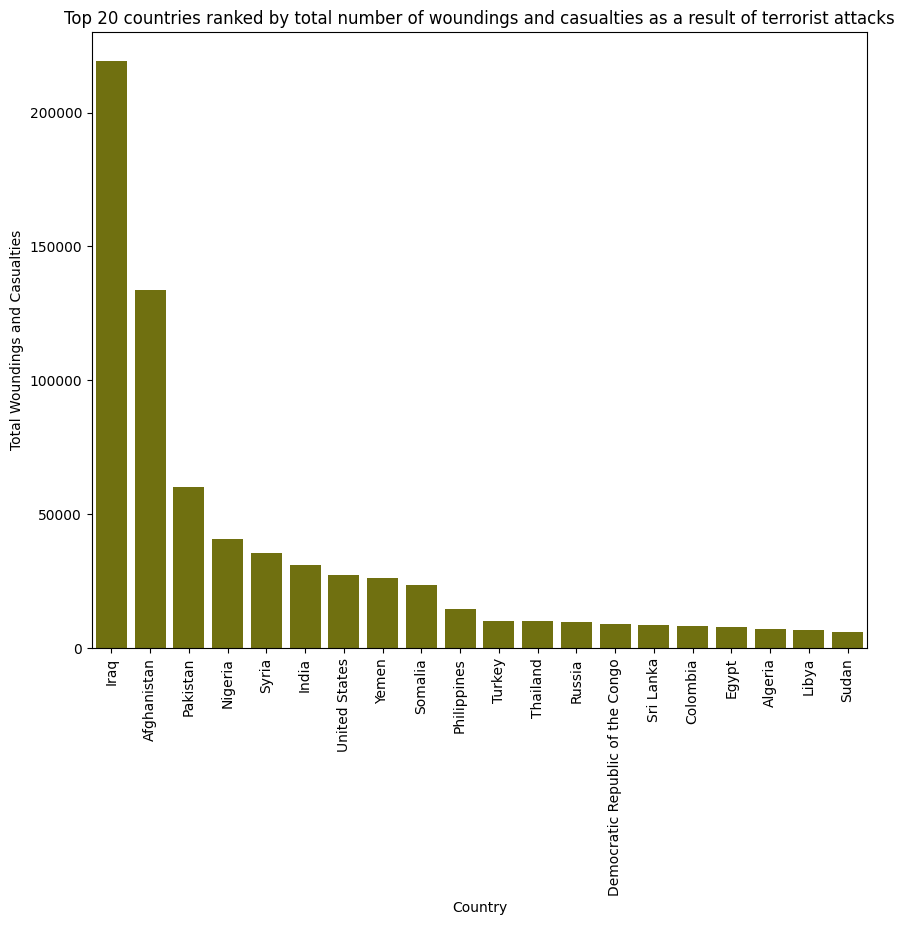

In [146]:
# Top 20 countries ranked by total number of woundings and casualties as a result of a terror attack

plt.figure(figsize=(10,8))
plt.title("Top 20 countries ranked by total number of woundings and casualties as a result of terrorist attacks")
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Total Woundings and Casualties")
sns.barplot(by_collateral.head(20), color='olive')
plt.show()


In [154]:
# Precise numeric values for the above figure:
by_collateral.head(20)

country_txt
Iraq                                219159
Afghanistan                         133556
Pakistan                             60319
Nigeria                              40846
Syria                                35376
India                                30834
United States                        27284
Yemen                                26134
Somalia                              23610
Philippines                          14707
Turkey                               10096
Thailand                              9918
Russia                                9783
Democratic Republic of the Congo      8973
Sri Lanka                             8724
Colombia                              8291
Egypt                                 8000
Algeria                               7049
Libya                                 6757
Sudan                                 6069
Name: totalCollateral, dtype: Int64

In [ ]:
# Countries ranked by the Frequency of Terrorist Attacks - Precise Numeric Values

by_freq = df.groupby("country_txt").size().sort_values(ascending=False)
by_freq.head(20)

country_txt
Iraq              27521
Afghanistan       18920
Pakistan          15504
India             13929
Colombia           8915
Philippines        8271
Peru               6111
Yemen              6027
Nigeria            5550
United Kingdom     5513
El Salvador        5320
Somalia            5317
Turkey             4485
Thailand           4201
Spain              3255
United States      3121
Sri Lanka          3041
Syria              2997
Algeria            2753
France             2751
dtype: int64

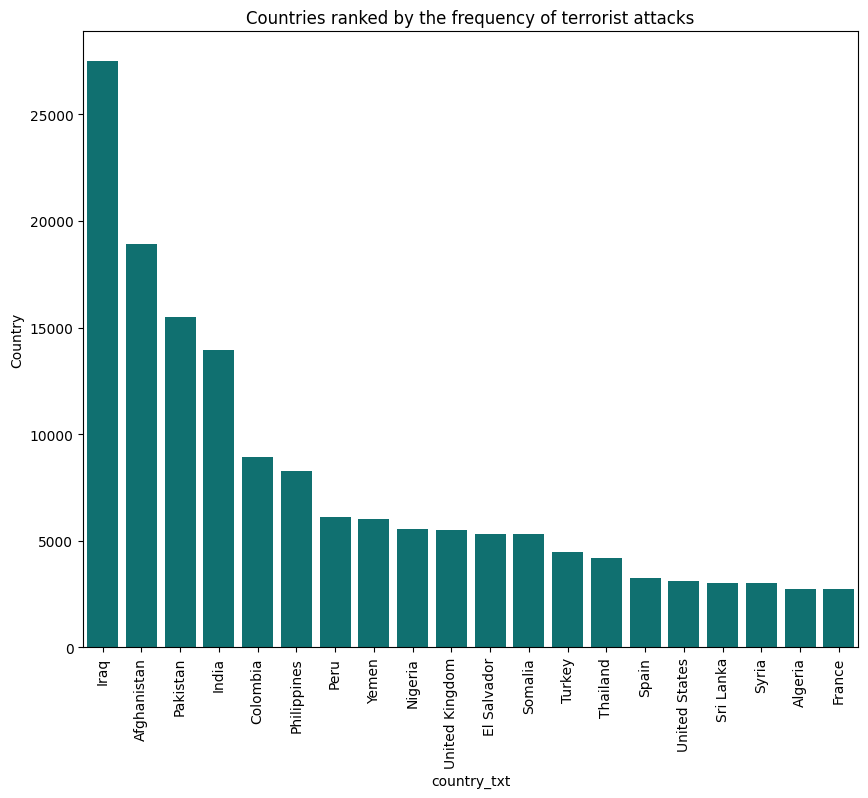

In [ ]:
# Countries ranked by the Frequency of Terrorist Attacks - Visualization

plt.figure(figsize=(10,8))
plt.title("Countries ranked by the frequency of terrorist attacks")
plt.ylabel("Frequency")
plt.ylabel("Country")
plt.xticks(rotation=90)
sns.barplot(data=by_freq.head(20), color='teal')
plt.show()